<!-- File automatically generated using DocOnce (https://github.com/doconce/doconce/):
doconce format ipynb preliminaries.do.txt --encoding=utf-8 --ipynb_admon=hrule --ipynb_disable_mpl_inline --ipynb_cite=latex-plain -->

# A brief recap of fundamental probability theory for UQ and SA
**Leif Rune Hellevik**, NTNU

Date: **Jan 29, 2026**

In [3]:
# @title
# python_source/ipynb_header.py
from IPython.display import HTML, display

display(HTML(r"""
<script>
(function () {
  // Guard: don't redefine macros multiple times if the cell is re-run
  if (window.__UQSA_MATHJAX_MACROS_SET__) return;
  window.__UQSA_MATHJAX_MACROS_SET__ = true;

  // Ensure MathJax config objects exist
  window.MathJax = window.MathJax || {};
  window.MathJax.tex = window.MathJax.tex || {};
  window.MathJax.tex.macros = Object.assign({}, window.MathJax.tex.macros, {
    dd: "\\,\\mathrm{d}",
    EE: "\\mathbb{E}",
    VV: "\\mathbb{V}",
    Var: "\\operatorname{Var}",
    E: "\\operatorname{E}"
  });

  // Re-typeset after macros are set (JupyterLab + Colab)
  function typeset() {
    if (window.MathJax && MathJax.typesetPromise) {
      MathJax.typesetPromise();
    }
  }
  setTimeout(typeset, 0);
})();
</script>
"""))

In [4]:
# @title
# Imports and definitions
from sympy import *
from sympy.stats import  Normal, density
init_printing(use_latex='mathjax')
from IPython.display import display;

x1,x2,y =symbols("x1,x2,y")

# Recap of basic statistics
This section provides a
brief recap of core concepts from probability theory that are
essential for uncertainty quantification and sensitivity analysis.
The presentation and structure are inspired by
[Rachel Fewster’s lecture notes on probability and expectation](https://www.stat.auckland.ac.nz/~fewster/325/notes/ch3.pdf),
with adaptations and extensions tailored to the needs of computational modeling and UQ/SA applications.

### Expectation

The mean, expected value, or expectation of a random variable $X$ is
denoted by $\mathbb{E}(X)$ or sometimes $\mu_X$. When the context is
clear, the subscript may be dropped, i.e. $\mathbb{E}(X)=\mu$.

The interpretation of $\mathbb{E}(X)$ is that if we observe $N$
independent realizations of $X$, their empirical mean approaches
$\mathbb{E}(X)$ as $N \to \infty$.

<div id="eq:exp_def"></div>

$$
\mathbb{E}(X)
= \int_{x_{\min}}^{x_{\max}} x\,p(x)\,\mathrm{d}x
$$

where $p(x)$ is the
[probability density function](https://en.wikipedia.org/wiki/Probability_density_function)
(pdf) of the random variable $X$.

With
[`sympy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html)
we may compute expectations symbolically.

In [5]:
# Expectation of a normally distributed variable
mu1 = symbols("mu1", positive=True)
V1 = symbols("sigma1", positive=True)
X1 = Normal("X", mu1, V1)
D1 = density(X1)(x1)
E1=Integral(x1*D1,(x1,-oo,oo))
display(Eq(E1,E1.doit()))   # use doit to evaluate an unevaluated integral

∞                                 
⌠                                 
⎮                    2            
⎮         -(-μ₁ + x₁)             
⎮         ─────────────           
⎮                 2               
⎮             2⋅σ₁                
⎮  √2⋅x₁⋅ℯ                        
⎮  ──────────────────── d(x₁) = μ₁
⎮        2⋅√π⋅σ₁                  
⌡                                 
-∞                                

In the snippet above, $X$ is normally distributed with mean $\mu_1$ and
variance $\sigma_1^2$. The integral returns
$\mathbb{E}(X)=\mu_1$, as expected.

### Variance

The variance quantifies the spread of a random variable around its mean:

<div id="eq:var_def"></div>

$$
\operatorname{Var}(X)
= \mathbb{E}\!\left[(X-\mathbb{E}(X))^2\right]
$$

Using linearity of expectation, this can be rewritten as

<div id="eq:var_alt"></div>

$$
\operatorname{Var}(X)
= \mathbb{E}(X^2) - \mathbb{E}(X)^2
$$

and equivalently

<div id="eq:ex2"></div>

$$
\mathbb{E}(X^2)
= \operatorname{Var}(X) + \mathbb{E}(X)^2
$$

The variance of the normal random variable above may also be computed
directly from definition
[(\#)](#eq:var_def).

In [6]:
# Compute the variance analytically
V = Integral((x1-E1.doit())**2*D1, (x1,-oo,oo))
display(Eq(V,V.doit()))

∞                                           
⌠                                           
⎮                             2             
⎮                  -(-μ₁ + x₁)              
⎮                  ─────────────            
⎮                          2                
⎮               2      2⋅σ₁                 
⎮  √2⋅(-μ₁ + x₁) ⋅ℯ                        2
⎮  ───────────────────────────── d(x₁) = σ₁ 
⎮             2⋅√π⋅σ₁                       
⌡                                           
-∞                                          

### Joint probability density functions

Let $X_1, X_2, \ldots$ be random variables with joint probability density
function (jpdf), see
[Wikipedia 1: Joint probability distribution](https://en.wikipedia.org/wiki/Joint_probability_distribution).

If the variables are independent, the jpdf factorizes as

<div id="eq:jpdf"></div>

$$
p(x_1,x_2) = p(x_1)\,p(x_2)
$$

Below we compute the expectation of a bivariate normal distribution.

In [7]:
# Expectation of the product of two normally distributed parameters
mu2 = symbols("mu2", positive=True)
V2 = symbols("sigma2", positive=True)
X2 = Normal("X", mu2, V2)
D2=density(X2)(x2)
jpdf=D1*D2
E2=Integral(x1*x2*jpdf,(x2,-oo,oo),(x1,-oo,oo))
display(Eq(E2,E2.doit())) # use doit to evaluate an unevaluated integral

∞  ∞                                                         
⌠  ⌠                                                         
⎮  ⎮                    2              2                     
⎮  ⎮         -(-μ₁ + x₁)    -(-μ₂ + x₂)                      
⎮  ⎮         ─────────────  ─────────────                    
⎮  ⎮                 2              2                        
⎮  ⎮             2⋅σ₁           2⋅σ₂                         
⎮  ⎮  x₁⋅x₂⋅ℯ             ⋅ℯ                                 
⎮  ⎮  ─────────────────────────────────── d(x₂) d(x₁) = μ₁⋅μ₂
⎮  ⎮               2⋅π⋅σ₁⋅σ₂                                 
⌡  ⌡                                                         
-∞ -∞                                                        

### Conditional probability density functions

Let $X$ and $Y$ be two random variables. Conditioning on $X=x$ leads to
the conditional pdf

<div id="eq:cond_pdf"></div>

$$
p(y \mid X=x) = \frac{p(x,y)}{p(x)}
$$

If $X$ and $Y$ are independent, the conditional pdf reduces to

<div id="eq:cond_pdf_simple"></div>

$$
p(y \mid X=x) = p(y)
$$

### Conditional expectation

The conditional expectation of $Y$ given $X=x$ is defined as

<div id="eq:cond_exp"></div>

$$
\mathbb{E}(Y \mid X=x)
= \int_{y_{\min}}^{y_{\max}} y\,p(y \mid X=x)\,\mathrm{d}y
$$

For fixed $x$, this is a scalar. As a function of $x$, however,
$\mathbb{E}(Y \mid X=x)$ is itself a random variable.

                  2 
       -(-μ₁ + x₁)  
       ─────────────
               2    
           2⋅σ₁     
√2⋅μ₂⋅ℯ             
────────────────────
      2⋅√π⋅σ₁       

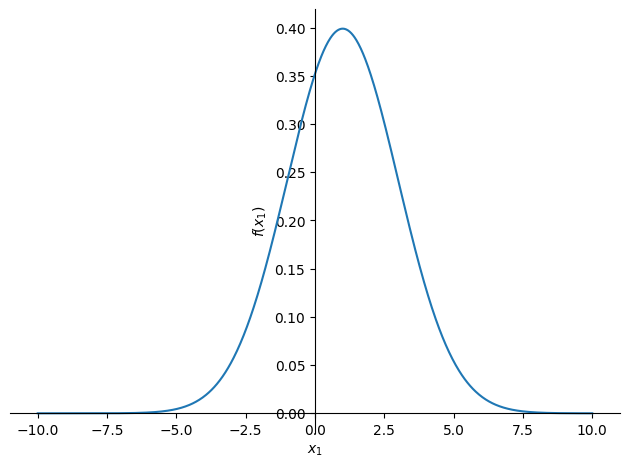

In [8]:
# Conditional expectation
E_given_x1=Integral(x2*jpdf,(x2,-oo,oo))
display(E_given_x1.doit())

from sympy.plotting import plot
mu1_value=1
V1_value=2
mu2_value=2
V2_value=1

Ex=E_given_x1.subs([(V1,V1_value),(mu2,mu2_value),(mu1,mu1_value)]).doit()
_=plot(Ex,(x1,-10,10))

### Adam's and Eve's laws

For two integrable random variables $X$ and $Y$, the law of total
expectation (Adam’s law) states

<div id="eq:adam"></div>

$$
\mathbb{E}(Y)
= \mathbb{E}\!\left[\mathbb{E}(Y \mid X)\right]
$$

Equivalently,

<div id="eq:adam_alt"></div>

$$
\mathbb{E}(Y)
= \mathbb{E}_X\!\left[\mathbb{E}_{Y\mid X}(Y \mid X)\right]
$$

The corresponding law of total variance (Eve’s law) is

<div id="eq:eve"></div>

$$
\operatorname{Var}(Y)
= \operatorname{Var}\!\left(\mathbb{E}(Y \mid X)\right)
+ \mathbb{E}\!\left(\operatorname{Var}(Y \mid X)\right)
$$

### Proof of the law of total variance

We start from the definition of the variance and expand the square:
$$
\operatorname{Var}(Y)
= \mathbb{E}\!\left[(Y-\mathbb{E}[Y])^2\right]
= \mathbb{E}\!\left[Y^2 - 2Y\,\mathbb{E}[Y] + \mathbb{E}[Y]^2\right].
$$

Using linearity of expectation and the fact that $\mathbb{E}[Y]$ is a constant, this simplifies to
$$
\operatorname{Var}(Y)
= \mathbb{E}[Y^2] - \mathbb{E}[Y]^2.
$$

Applying the same identity conditionally on $X$ gives the conditional variance

$$
\operatorname{Var}(Y \mid X)
= \mathbb{E}[Y^2 \mid X] - \mathbb{E}[Y \mid X]^2.
$$

Taking expectations of both sides yields

$$
\mathbb{E}[\operatorname{Var}(Y \mid X)]
= \mathbb{E}\!\left[\mathbb{E}[Y^2 \mid X]\right]
-
  \mathbb{E}\!\left[\mathbb{E}[Y \mid X]^2\right].
$$

By the tower property of conditional expectation,
$$
\mathbb{E}\!\left[\mathbb{E}[Y^2 \mid X]\right] = \mathbb{E}[Y^2],
$$
so we obtain

$$
\mathbb{E}[\operatorname{Var}(Y \mid X)]
= \mathbb{E}[Y^2]
-  \mathbb{E}\!\left[\mathbb{E}[Y \mid X]^2\right].
$$

Next, consider the variance of the conditional mean:

$$
\operatorname{Var}(\mathbb{E}[Y \mid X])
= \mathbb{E}\!\left[\mathbb{E}[Y \mid X]^2\right]
-   
  \mathbb{E}[\mathbb{E}[Y \mid X]]^2.
$$

Again by the tower property,
$$
\mathbb{E}[\mathbb{E}[Y \mid X]] = \mathbb{E}[Y],
$$
which gives
$$
\operatorname{Var}(\mathbb{E}[Y \mid X])
= \mathbb{E}\!\left[\mathbb{E}[Y \mid X]^2\right]
-  \mathbb{E}[Y]^2.
$$

Adding the two expressions yields
$$
\mathbb{E}[\operatorname{Var}(Y \mid X)]
+ \operatorname{Var}(\mathbb{E}[Y \mid X])
= \mathbb{E}[Y^2] - \mathbb{E}[Y]^2
= \operatorname{Var}(Y),
$$
which proves the law of total variance.

# Generalization to a computational model

Consider a computational model

<div id="eq:model"></div>

$$
y = f(x_1, x_2, \ldots, x_k)
$$

where the inputs $x_i$ are independent random variables with marginal
pdfs $p_i(x_i)$.

The joint pdf is

$$
p(x_1,\ldots,x_k)
= \prod_{i=1}^k p_i(x_i)
$$

The expectation of the output is

$$
\mathbb{E}(y)
= \int \cdots \int
f(x_1,\ldots,x_k)
\prod_{i=1}^k p_i(x_i)\,
\mathrm{d}x_1 \cdots \mathrm{d}x_k
$$

and the variance is

$$
\operatorname{Var}(y)
= \mathbb{E}(y^2) - \mathbb{E}(y)^2
$$

# References

* Rachel Fewster, *Probability Theory Notes*, University of Auckland, <https://www.stat.auckland.ac.nz/~fewster/325/notes/ch3.pdf>

* Wikipedia contributors, *Probability density function*, <https://en.wikipedia.org/wiki/Probability_density_function>

* Wikipedia contributors, *Joint probability distribution*, <https://en.wikipedia.org/wiki/Joint_probability_distribution>